In [1]:
pip install numpy matplotlib seaborn pandas scipy tqdm vtk

Note: you may need to restart the kernel to use updated packages.


In [4]:
import DiFfRG.file_io as io
import DiFfRG.plot as plt

import numpy as np
import math

from scipy.interpolate import make_interp_spline
from scipy.optimize import minimize

folder = "./build/"

p_resc =  1.9805365893096722
Z_resc =  0.47849780883658144


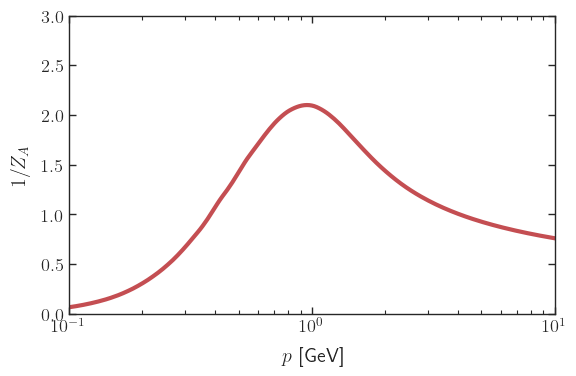

In [9]:
kGeV, Zdat = io.read_k_csv(folder + "Zs.csv")
pGeV = Zdat[0]["pGeV"].to_numpy()
ZA = Zdat[0]["ZA"].to_numpy()

ZA_spl = make_interp_spline(pGeV, ZA, k=2)
better_p = np.exp(np.linspace(-4, 2, 256))
better_ZA = ZA_spl(better_p)

def chi_sq(opt):
    p_resc = opt[0]
    Z_resc = opt[1]
    p_max_lat = 0.955
    # find the maximum of the interpolated data
    p_max = better_p[np.argmin(better_ZA)] * p_resc

    return (p_max - p_max_lat)**2  + (better_ZA[np.argmin(better_ZA)] / Z_resc - 1/2.1)**2

p_resc, Z_resc = minimize(chi_sq, np.array([1, 0.7])).x

print("p_resc = ", p_resc)
print("Z_resc = ", Z_resc)
    
plt.plot_1D(
    [
        {
            "x": better_p*p_resc,
            "y": 1 / better_ZA * Z_resc,
            "scatter": False,
            "color" : plt.palette1[3],
            "label": "this work",
            "lw": 3
        },
    ],
    log_x=True,
    xlim = [1e-1, 10],
    ylim = [0, 3],
    legend_loc="upper left",
    xlabel=r"$p$ [GeV]",
    ylabel=r"$1/Z_A$",
    #file="YM_ZA_compare.pdf",
)

maximum at p =  0.9576335562801708
kappa =  0.5701396627646222


/tmp/ipykernel_1625683/2053994082.py:26: RuntimeWarning: overflow encountered in power
  return A * p**(4 * kappa)


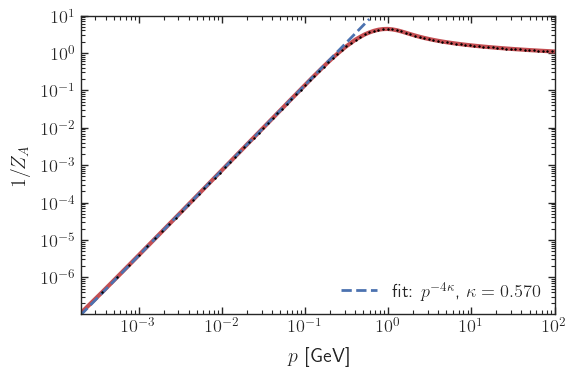

kappa =  0.5670498811528242


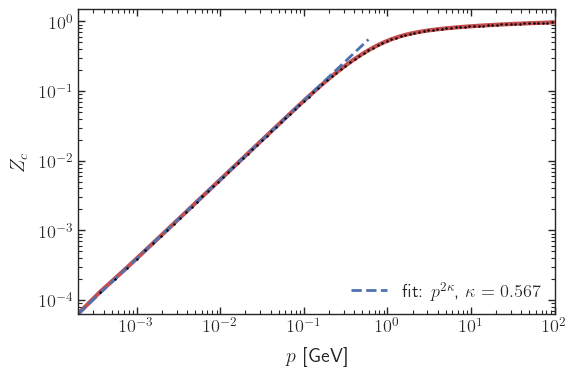

In [10]:
kGeV, Zdat = io.read_k_csv(folder + "Zs.csv")

pGeV = Zdat[0]["pGeV"].to_numpy()
ZA = Zdat[0]["ZA"].to_numpy()
ZAbar = Zdat[0]["ZAbar"].to_numpy()
Zc = Zdat[0]["Zc"].to_numpy()

kGeV, alphas = io.read_k_csv(folder + "strong_couplings.csv")
alphaAcbc = alphas[0]["alphaAcbc"].to_numpy()
alphaA3 = alphas[0]["alphaA3"].to_numpy()
alphaA4 = alphas[0]["alphaA4"].to_numpy()

pGeV = pGeV * p_resc

# find the value of p where ZA is smallest, using a spline interpolation
spl = make_interp_spline(pGeV, ZA, k=2)
better_p = np.exp(np.linspace(np.log(pGeV.min()), np.log(pGeV).max(), 2048))
better_ZA = spl(better_p)
pMax = better_p[np.argmin(better_ZA)]
print("maximum at p = ", pMax)

# fit ZA with p^(-4 * kappa) using scipy curve_fit
from scipy.optimize import curve_fit

def fit_func(p, kappa, A):
    return A * p**(4 * kappa)

fit_max = 0.05

ZA_fit = 1 / ZA[pGeV < fit_max]
pGeV_fit = pGeV[pGeV < fit_max]
popt, pcov = curve_fit(fit_func, pGeV_fit, ZA_fit)
print("kappa = ", popt[0])

plt.plot_1D(
    [
        {
            "x": pGeV,
            "y": 1 / ZA,
            "lw": 3,
            "color" : plt.palette1[3],
        },
        {
            "x": pGeV,
            "y": 1 / ZA,
            "scatter": True,
            "color" : "black",
            "size": 2,
        },
        # fit
        {
            "x": pGeV[pGeV < 0.6],
            "y": fit_func(pGeV[pGeV < 0.6], *popt),
            "label" : r"fit: $p^{-4 \kappa}$, " + rf"$\kappa = {popt[0]:.3f}$",
            "linestyle": "--",
            "color": plt.palette1[0],
        },
    ],
    log_x=True,
    log_y=True,
    grid=False,
    xlabel=r"$p$ [GeV]",
    ylabel=r"$1/Z_A$",
    ylim=[np.min(1 / ZA) * 0.99, 10.0],
    xlim=[2e-4, 100],
    legend_loc="lower right",
    #file="YM_ZA.pdf"
)

def fit_func(p, kappa, A):
    return A * p**(2 * kappa)

Zc_fit = Zc[pGeV < fit_max]
pGeV_fit = pGeV[pGeV < fit_max]
popt, pcov = curve_fit(fit_func, pGeV_fit, Zc_fit)
print("kappa = ", popt[0])

plt.plot_1D(
    [
        {
            "x": pGeV,
            "y": Zc,
            #"label" : r"$Z_c$",
            "lw": 3,
            "color": plt.palette1[3],
        },
        {
            "x": pGeV,
            "y": Zc,
            "scatter": True,
            "color" : "black",
            "size": 2,
        },
        # fit
        {
            "x": pGeV[pGeV < 0.6],
            "y": fit_func(pGeV[pGeV < 0.6], *popt),
            "label" : r"fit: $p^{2 \kappa}$, " + rf"$\kappa = {popt[0]:.3f}$",
            "linestyle": "--",
            "color": plt.palette1[0],
        },
    ],
    log_x=True,
    log_y=True,
    grid=False,
    xlim = [2e-4, 100],
    ylim = [np.min(Zc)*1.0, 1.5],
    xlabel=r"$p$ [GeV]",
    ylabel=r"$Z_c$",
    legend_loc="lower right",
    #file="YM_Zc.pdf"
)

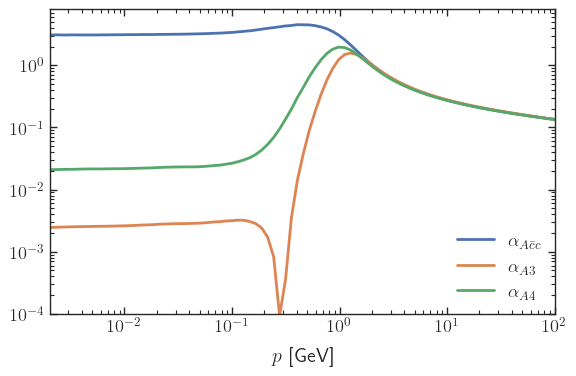

In [13]:
plt.plot_1D(
    [   
        {
            "x": pGeV,
            "y": alphaAcbc,
            "label" : r"$\alpha_{A\bar{c}c}$",
            "lw": 2,
        },
        {
            "x": pGeV,
            "y": alphaA3,
            "label" : r"$\alpha_{A3}$",
            "lw": 2,
        },
        {
            "x": pGeV,
            "y": alphaA4,
            "label" : r"$\alpha_{A4}$",
            "lw": 2,
        },
    ],
    log_x=True,
    log_y=True,
    grid=False,
    #ylim=[1e-5, 10],
    xlim=[2.01e-3, 100],
    ylim=[1e-4, 8],
    xlabel=r"$p$ [GeV]",
    legend_loc="lower right",
    #file="YM_alphas.pdf"
)

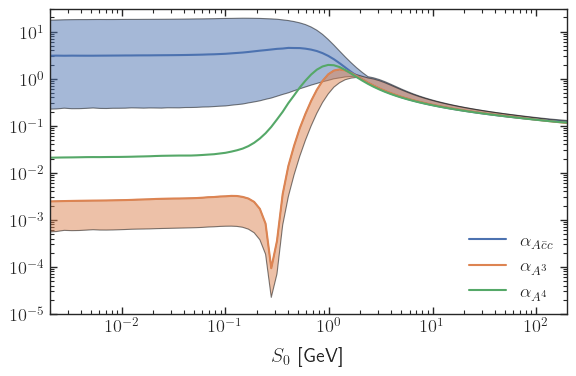

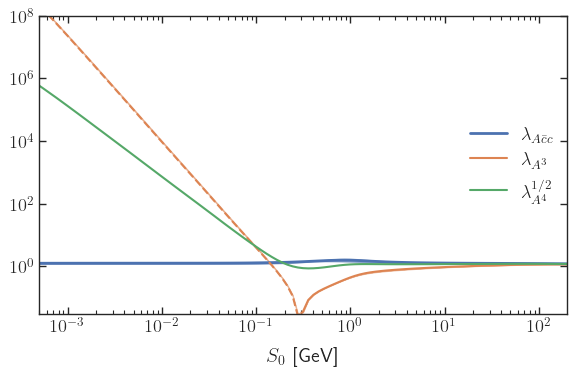

In [14]:
kGeV, couplings_3D = io.read_k_csv(folder + "strong_couplings_3D.csv")
S0, couplings_3D = io.split_csv(couplings_3D[0], "S0GeV")
Acbc_range = np.zeros((len(S0), 2))
Acbc_SP = np.zeros((len(S0)))
A3_range = np.zeros((len(S0), 2))
A3_SP = np.zeros((len(S0)))

S0 = S0 * p_resc

ZAcbc_range = np.zeros((len(S0), 2))
ZAcbc_SP = np.zeros((len(S0)))
ZA3_range = np.zeros((len(S0), 2))
ZA3_SP = np.zeros((len(S0)))

for cur_idx in range(len(couplings_3D)):
    Acbc_range[cur_idx,0] = np.min(couplings_3D[cur_idx]["alphaAcbc"].to_numpy())
    Acbc_range[cur_idx,1] = np.max(couplings_3D[cur_idx]["alphaAcbc"].to_numpy())
    Acbc_SP[cur_idx] = couplings_3D[cur_idx]["alphaAcbc"].to_numpy()[0]
    A3_range[cur_idx,0] = np.min(couplings_3D[cur_idx]["alphaA3"].to_numpy())
    A3_range[cur_idx,1] = np.max(couplings_3D[cur_idx]["alphaA3"].to_numpy())
    A3_SP[cur_idx] = couplings_3D[cur_idx]["alphaA3"].to_numpy()[0]
    ZAcbc_range[cur_idx,0] = np.min(np.abs(couplings_3D[cur_idx]["ZAcbc"].to_numpy()))
    ZAcbc_range[cur_idx,1] = np.max(np.abs(couplings_3D[cur_idx]["ZAcbc"].to_numpy()))
    ZAcbc_SP[cur_idx] = np.abs(couplings_3D[cur_idx]["ZAcbc"].to_numpy()[0])
    ZA3_range[cur_idx,0] = np.min(np.abs(couplings_3D[cur_idx]["ZA3"].to_numpy()))
    ZA3_range[cur_idx,1] = np.max(np.abs(couplings_3D[cur_idx]["ZA3"].to_numpy()))
    ZA3_SP[cur_idx] = couplings_3D[cur_idx]["ZA3"].to_numpy()[0]

plt.plot_1D(
    [
        {
            "x": S0,
            "y": Acbc_SP,
            "label" : r"$\alpha_{A\bar{c}c}$",
            "lw": 1.5,
            "color" : plt.palette1[0],
        },
        {
            "x": S0,
            "y": A3_SP,
            "label" : r"$\alpha_{A^3}$",
            "lw": 1.5,
            "color" : plt.palette1[1],
        },
        {
            "x": S0,
            "y": alphaA4,
            "label" : r"$\alpha_{A^4}$",
            "lw": 1.5,
            "color" : plt.palette1[2],
        },
    ],
    modifiers=[
        lambda ax: ax.fill_between(S0, Acbc_range[:,0], Acbc_range[:,1], alpha=0.5, color=plt.palette1[0], ec="black"),
        lambda ax: ax.fill_between(S0, A3_range[:,0], A3_range[:,1], alpha=0.5, color=plt.palette1[1], ec="black"),
    ],
    log_x=True,
    log_y=True,
    xlabel=r"$S_0$ [GeV]",
    xlim=[2e-3, np.max(S0)],
    ylim=[1e-5, 30],
    legend_loc="lower right",
    #file = "YM_couplings.pdf"
)

plt.plot_1D(
    [
        {
            "x": S0,
            "y": ZAcbc_SP,
            "label" : r"$\lambda_{A\bar{c}c}$",
            "linewidth": 0.5,
            "color" : plt.palette1[0],
        },
        {
            "x": S0[ZA3_SP > 0],
            "y": ZA3_SP[ZA3_SP > 0],
            "label" : r"$\lambda_{A^3}$",
            "lw": 1.5,
            "color" : plt.palette1[1],
        },
        {
            "x": S0[ZA3_SP < 5e-2],
            "y": np.abs(ZA3_SP[ZA3_SP < 5e-2]),
            "lw": 1.5,
            "color" : plt.palette1[1],
            "linestyle" : "dashed"
        },
        {
            "x": S0,
            "y": (alphaA4 * 4 * math.pi * ZA**2)**0.5,
            "label" : r"$\lambda_{A^4}^{1/2}$",
            "lw": 1.5,
            "color" : plt.palette1[2],
        },
    ],
    modifiers=[
        lambda ax: ax.fill_between(S0, ZAcbc_range[:,0], ZAcbc_range[:,1], alpha=0.5, color=plt.palette1[0]),
        lambda ax: ax.fill_between(S0, np.abs(ZA3_range[:,0]), np.abs(ZA3_range[:,1]), alpha=0.5, color=plt.palette1[1]),
    ],
    log_x=True,
    log_y=True,
    xlim=[5.0e-4, np.max(S0)],
    ylim=[3e-2, 1e8],
    xlabel=r"$S_0$ [GeV]",
    legend_loc="center right",
    #file = "YM_dressings.pdf"
)

In [15]:
def as_point(S1, SPhi):
    return np.array([S1 * math.cos(SPhi), S1 * math.sin(SPhi)])
soft_p1 = as_point(1., -math.pi / 6 - 4. * math.pi / 3)
soft_p2 = as_point(1., -math.pi / 6)
soft_p3 = as_point(1., -math.pi / 6 - 2. * math.pi / 3)

print("soft_p1 = ", soft_p1)
print("soft_p2 = ", soft_p2)
print("soft_p3 = ", soft_p3)

fac = p_resc

soft_p1 =  [-1.8369702e-16  1.0000000e+00]
soft_p2 =  [ 0.8660254 -0.5      ]
soft_p3 =  [-0.8660254 -0.5      ]


In [16]:
kGeV, couplings_3D = io.read_k_csv("build/strong_couplings_3D.csv")
angle, couplings_3D = io.split_csv(couplings_3D[0], "S0GeV")

cur_idx = 53
cur_coup = couplings_3D[cur_idx]

print("p = ", cur_coup["S0GeV"].to_numpy()[0] * fac, "GeV")

S1_orig = np.unique(cur_coup["S1"].to_numpy())
SPhi_orig = np.unique(cur_coup["SPhi"].to_numpy())
alphaAcbc_orig = np.reshape(cur_coup["alphaAcbc"].to_numpy(), (len(S1_orig), len(SPhi_orig)))
alphaA3_orig = np.reshape(cur_coup["alphaA3"].to_numpy(), (len(S1_orig), len(SPhi_orig)))
ZAcbc_orig = np.reshape(cur_coup["ZAcbc"].to_numpy(), (len(S1_orig), len(SPhi_orig)))
ZA3_orig = np.reshape(cur_coup["ZA3"].to_numpy(), (len(S1_orig), len(SPhi_orig)))


# Interpolate for better resolution

from scipy.interpolate import RegularGridInterpolator

alphaAcbc_interp = RegularGridInterpolator((np.unique(S1_orig), np.unique(SPhi_orig)), alphaAcbc_orig, method="cubic", bounds_error=False, fill_value=None)
alphaA3_interp = RegularGridInterpolator((np.unique(S1_orig), np.unique(SPhi_orig)), alphaA3_orig, method="cubic", bounds_error=False, fill_value=None)
ZAcbc_interp = RegularGridInterpolator((np.unique(S1_orig), np.unique(SPhi_orig)), ZAcbc_orig, method="cubic", bounds_error=False, fill_value=None)
ZA3_interp = RegularGridInterpolator((np.unique(S1_orig), np.unique(SPhi_orig)), ZA3_orig, method="cubic", bounds_error=False, fill_value=None)

# Interpolate
S1 = np.linspace(0.001, 1., 128)
SPhi = np.linspace(SPhi_orig[0], SPhi_orig[-1], 128)

# Go to spherical coordinates
S1, SPhi = np.meshgrid(S1, SPhi)
X = S1 * np.cos(SPhi)
Y = S1 * np.sin(SPhi)

alphaAcbc = alphaAcbc_interp((S1, SPhi))
alphaA3 = alphaA3_interp((S1, SPhi))
ZAcbc = ZAcbc_interp((S1, SPhi))
ZA3 = ZA3_interp((S1, SPhi))

p =  0.9824006130538034 GeV


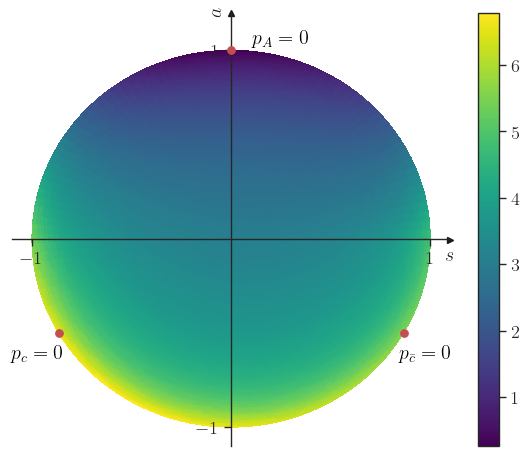

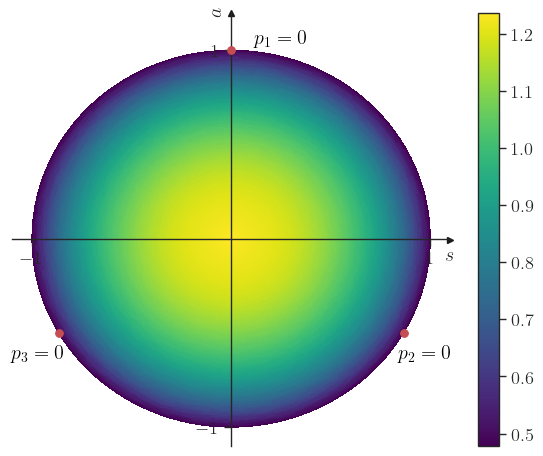

In [17]:
plt.plot_2D(
  data = {
    "x" : X.flatten(),
    "y" : Y.flatten(),
    "z" : alphaAcbc.flatten(),
  },
  modifiers=[
      #lambda ax : ax.set_title(r"$\alpha_{A\bar{c}c}$"),
      # draw the soft points
      lambda ax : ax.scatter(soft_p1[0], soft_p1[1], color=plt.palette1[3], marker="o", s=30, zorder=100000),
      lambda ax : ax.scatter(soft_p2[0], soft_p2[1], color=plt.palette1[3], marker="o", s=30),
      lambda ax : ax.scatter(soft_p3[0], soft_p3[1], color=plt.palette1[3], marker="o", s=30),
      # annotate the soft points
      lambda ax : ax.annotate(r"$p_A=0$", soft_p1, textcoords="offset points", xytext=(35, 5), ha='center', color="black"),
      lambda ax : ax.annotate(r"$p_{\bar{c}}=0$", soft_p2, textcoords="offset points", xytext=(34, -18), ha='right', color="black"),
      lambda ax : ax.annotate(r"$p_c=0$", soft_p3, textcoords="offset points", xytext=(-35, -18), ha='left', color="black"),
      # set ticks only at +-1
      lambda ax : ax.set_xticks([-1, 1]),
      lambda ax : ax.set_yticks([-1, 1]),
  ],
  cmap = "viridis",
  style = "triplot",
  log_x = False,
  log_y = False,
  log_z = False,
  grid = False,
  xlim = [-1.1, 1.1],
  ylim = [-1.1, 1.2],
  #zlim = [1e-5, 1.5],
  angle_3d = [20, 60+60],
  xlabel = r"$s$",
  ylabel = r"$a$",
  aspect = [1.5, 1.5, 1],
  figsize = [6, 4.8],
  axstyle = "centered",
  #file = "YM_alphaA3_slice.pdf"
)

plt.plot_2D(
  data = {
    "x" : X.flatten(),
    "y" : Y.flatten(),
    "z" : alphaA3.flatten(),
  },
  modifiers=[
      #lambda ax : ax.set_title(r"$\alpha_{A^3}$"),
      # draw the soft points
      lambda ax : ax.scatter(soft_p1[0], soft_p1[1], color=plt.palette1[3], marker="o", s=30, zorder=100000),
      lambda ax : ax.scatter(soft_p2[0], soft_p2[1], color=plt.palette1[3], marker="o", s=30),
      lambda ax : ax.scatter(soft_p3[0], soft_p3[1], color=plt.palette1[3], marker="o", s=30),
      # annotate the soft points
      lambda ax : ax.annotate(r"$p_1=0$", soft_p1, textcoords="offset points", xytext=(35, 5), ha='center', color="black"),
      lambda ax : ax.annotate(r"$p_2=0$", soft_p2, textcoords="offset points", xytext=(34, -18), ha='right', color="black"),
      lambda ax : ax.annotate(r"$p_3=0$", soft_p3, textcoords="offset points", xytext=(-35, -18), ha='left', color="black"),
      # set ticks only at +-1
      lambda ax : ax.set_xticks([-1, 1]),
      lambda ax : ax.set_yticks([-1, 1]),
  ],
  cmap = "viridis",
  style = "triplot",
  log_x = False,
  log_y = False,
  log_z = False,
  grid = False,
  xlim = [-1.1, 1.1],
  ylim = [-1.1, 1.2],
  #zlim = [1e-5, 1.5],
  angle_3d = [20, 60+60],
  xlabel = r"$s$",
  ylabel = r"$a$",
  aspect = [1.5, 1.5, 1],
  figsize = [6, 4.8],
  axstyle = "centered",
  #file = "YM_alphaAcbc_slice.pdf"
)

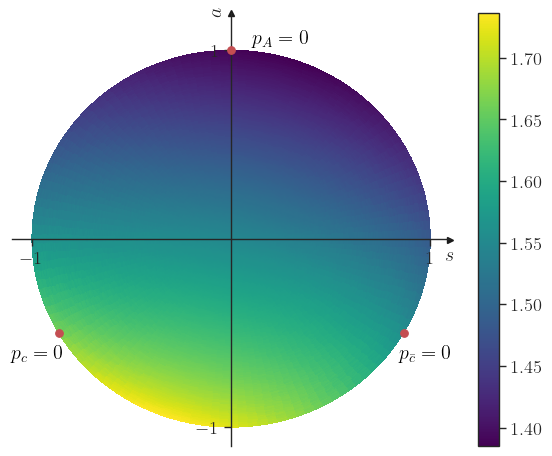

In [18]:
plt.plot_2D(
  data = {
    "x" : X.flatten(),
    "y" : Y.flatten(),
    "z" : ZAcbc.flatten(),
  },
  modifiers=[
      #lambda ax : ax.set_title(r"$\alpha_{A\bar{c}c}$"),
      # draw the soft points
      lambda ax : ax.scatter(soft_p1[0], soft_p1[1], color=plt.palette1[3], marker="o", s=30, zorder=100000),
      lambda ax : ax.scatter(soft_p2[0], soft_p2[1], color=plt.palette1[3], marker="o", s=30),
      lambda ax : ax.scatter(soft_p3[0], soft_p3[1], color=plt.palette1[3], marker="o", s=30),
      # annotate the soft points
      lambda ax : ax.annotate(r"$p_A=0$", soft_p1, textcoords="offset points", xytext=(35, 5), ha='center', color="black"),
      lambda ax : ax.annotate(r"$p_{\bar{c}}=0$", soft_p2, textcoords="offset points", xytext=(34, -18), ha='right', color="black"),
      lambda ax : ax.annotate(r"$p_c=0$", soft_p3, textcoords="offset points", xytext=(-35, -18), ha='left', color="black"),
      # set ticks only at +-1
      lambda ax : ax.set_xticks([-1, 1]),
      lambda ax : ax.set_yticks([-1, 1]),
  ],
  cmap = "viridis",
  style = "triplot",
  log_x = False,
  log_y = False,
  log_z = False,
  grid = False,
  xlim = [-1.1, 1.1],
  ylim = [-1.1, 1.2],
  #zlim = [1.8, 2.8],
  angle_3d = [30, 80+60],
  xlabel = r"$s$",
  ylabel = r"$a$",
  #zlabel = r"$Z_{A\bar{c}c}$",
  aspect = [1.5, 1.5, 1],
  figsize = [6, 4.8],
  axstyle = "centered",
  #file = "YM_ZAcbc_slice.png"
)

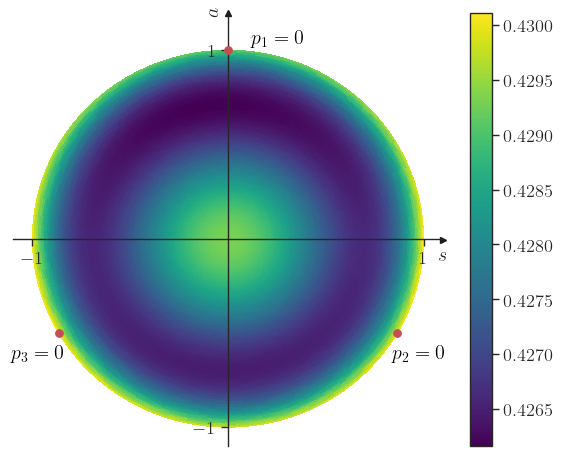

In [19]:
import importlib
importlib.reload(plt)

plt.plot_2D(
  data = {
    "x" : X.flatten(),
    "y" : Y.flatten(),
    "z" : ZA3.flatten(),
  },
  modifiers=[
      #lambda ax : ax.set_title(r"$\alpha_{A^3}$"),
      # draw the soft points
      lambda ax : ax.scatter(soft_p1[0], soft_p1[1], color=plt.palette1[3], marker="o", s=30, zorder=100000),
      lambda ax : ax.scatter(soft_p2[0], soft_p2[1], color=plt.palette1[3], marker="o", s=30),
      lambda ax : ax.scatter(soft_p3[0], soft_p3[1], color=plt.palette1[3], marker="o", s=30),
      # annotate the soft points
      lambda ax : ax.annotate(r"$p_1=0$", soft_p1, textcoords="offset points", xytext=(35, 5), ha='center', color="black"),
      lambda ax : ax.annotate(r"$p_2=0$", soft_p2, textcoords="offset points", xytext=(34, -18), ha='right', color="black"),
      lambda ax : ax.annotate(r"$p_3=0$", soft_p3, textcoords="offset points", xytext=(-35, -18), ha='left', color="black"),
      # set ticks only at +-1
      lambda ax : ax.set_xticks([-1, 1]),
      lambda ax : ax.set_yticks([-1, 1]),
      lambda ax : ax.xaxis.set_label_coords(1.0, 0.485),
      lambda ax : ax.yaxis.set_label_coords(0.485, 1.0) 
  ],
  cmap = "viridis",
  style = "triplot",
  log_x = False,
  log_y = False,
  log_z = False,
  grid = False,
  xlim = [-1.1, 1.1],
  ylim = [-1.1, 1.2],
  #zlim = [1e-5, 1.5],
  angle_3d = [20, 60+60],
  xlabel = r"$s$",
  ylabel = r"$a$",
  aspect = [1.5, 1.5, 1],
  figsize = [6, 4.8],
  axstyle = "centered",
  #file = "YM_ZA3_slice.png"
)

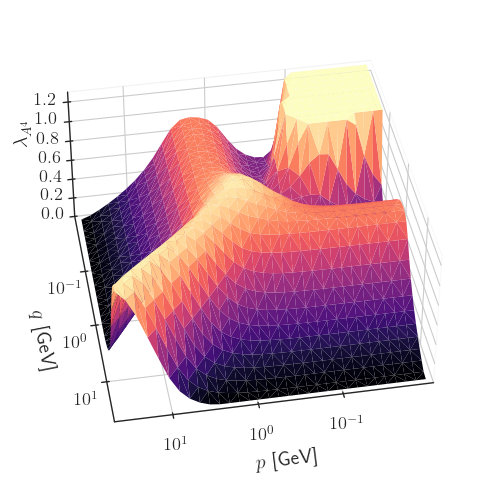

In [20]:
kGeV, couplings_3D = io.read_k_csv("build/strong_couplings_3D.csv")
# extract SPhi and S1
grid = couplings_3D[0][["S0GeV", "S1", "SPhi"]].to_numpy()
S0 = np.unique(grid[:,0])
S1 = np.unique(grid[:,1])
SPhi = np.unique(grid[:,2])
data = np.reshape(couplings_3D[0]["ZA4tadpole"].to_numpy(), (len(S0), len(S1), len(SPhi)))
ZA4tadpole = RegularGridInterpolator((S0, S1, SPhi), data, method="linear", bounds_error=False, fill_value=None)

def pq_to_s(p, q):
    s0 = (3*p**2 + 4*q**2)**0.5 /6**0.5
    s1 = np.abs(3*p**2 - 4*q**2) / (3*p**2 + 4*q**2)
    sphi = math.pi / 2
    return s0, s1, sphi

# Interpolate
p_grid_2d = 10**(np.linspace(-2, np.log10(40), 32))

# Go to 2d cartesian coordinates
P1, P2 = np.meshgrid(p_grid_2d, p_grid_2d)
ZA4tadpole_grid = ZA4tadpole((pq_to_s(P1, P2)))

ZA4tadpole_grid = np.clip(ZA4tadpole_grid, 0, 1.3)


plt.plot_2D(
  data = {
    "x" : P1.flatten(),
    "y" : P2.flatten(),
    "z" : ZA4tadpole_grid.flatten(),
  },
  cmap = "magma",
  style = "3D",
  log_x = True,
  log_y = True,
  log_z = False,
  grid = True,
  #xlim = [-1.1, 1.1],
  #ylim = [-1.1, 1.2],
  zlim = [0, 1.3],
  angle_3d = [40, 60+20],
  xlabel = r"$p$ [GeV]",
  ylabel = r"$q$ [GeV]",
  zlabel = r"$\lambda_{A^4}$",
  aspect = [2.5, 2.5, 1.3],
  figsize = [6, 4.8],
  ##axstyle = "centered",
  #file = "YM_ZA4_slice.png"
)